<a href="https://colab.research.google.com/github/Rasul-projects/gsoc-fashion-mnist/blob/main/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


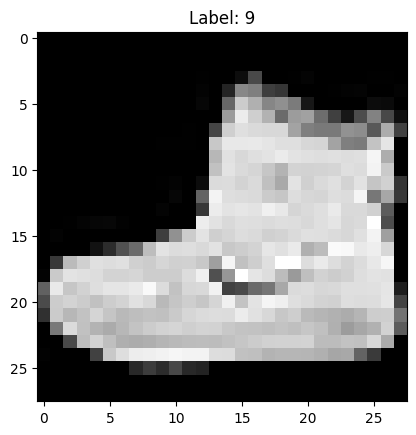

In [9]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Check dataset shape
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Display a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [10]:
# Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7836 - loss: 0.6372 - val_accuracy: 0.8432 - val_loss: 0.4260
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8587 - loss: 0.3979 - val_accuracy: 0.8662 - val_loss: 0.3700
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8744 - loss: 0.3481 - val_accuracy: 0.8697 - val_loss: 0.3576
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8828 - loss: 0.3186 - val_accuracy: 0.8605 - val_loss: 0.3940
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8888 - loss: 0.2992 - val_accuracy: 0.8848 - val_loss: 0.3291


In [12]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.3392
Test Accuracy: 0.8761000037193298


In [13]:
import numpy as np

# Predict first 5 test images
predictions = model.predict(x_test[:5])
for i in range(5):
    print("Predicted Label:", np.argmax(predictions[i]), "True Label:", y_test[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Label: 9 True Label: 9
Predicted Label: 2 True Label: 2
Predicted Label: 1 True Label: 1
Predicted Label: 1 True Label: 1
Predicted Label: 6 True Label: 6
